<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [25]:
# импортируем библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('datasets/insurance.csv')

In [12]:
# Отобразим первые несколько строк
print(data.head())

# Отобразить последние несколько строк
print(data.tail())

# Получим общую информацию о данных, включая количество строк, типы данных и статистические данные
data.info()

# Получим основные статистические данные по числовым столбцам
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


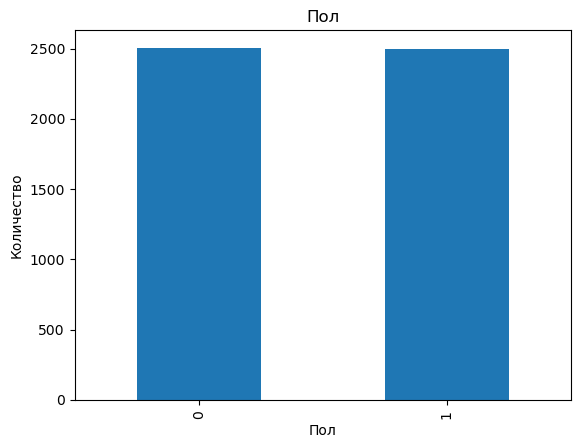

In [19]:
# построение столбчатого графика
gender_counts = data['Пол'].value_counts()

gender_counts.plot(kind='bar')

plt.title('Пол')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

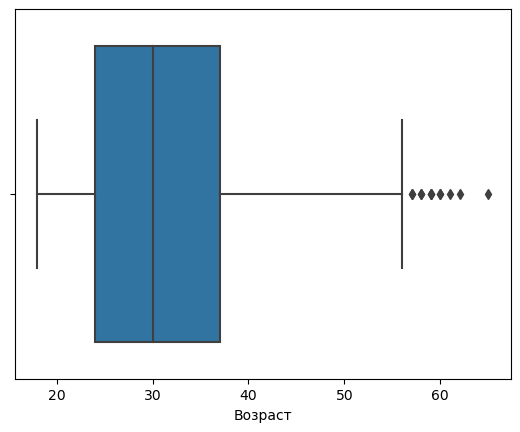

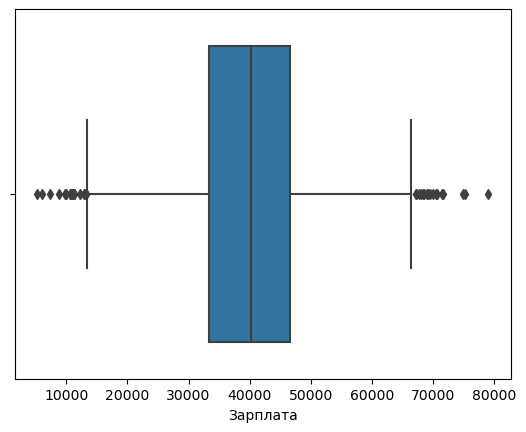

In [28]:
sns.boxplot(x=data['Возраст'])
plt.show()

sns.boxplot(x=data['Зарплата'])
plt.show()

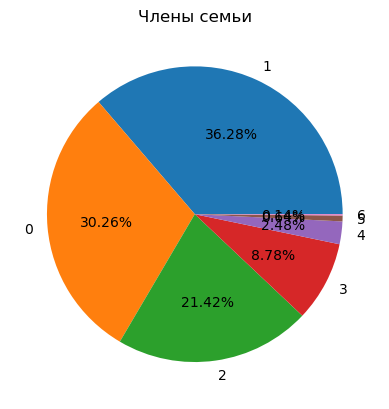

In [33]:
counts = data['Члены семьи'].value_counts()
labels = counts.index.tolist()

plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.title('Члены семьи')
plt.show()

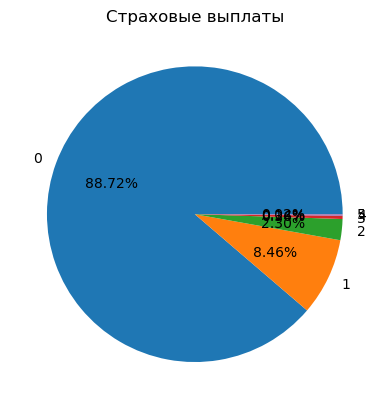

In [36]:
counts = data['Страховые выплаты'].value_counts()
labels = counts.index.tolist()

plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.title('Страховые выплаты')
plt.show()

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА 2:</b><br>
    <ul>
        <li>Загружены и изучены данные data из CSV-файла 'datasets/insurance.csv'.</li>
        <li>Из data.describe() можно сделать следующие выводы:
            <ul>
                <li>В выборке 5000 человек.</li>
                <li>Средний возраст составляет 30,95 лет.</li>
                <li>Средняя зарплата равна 39916,36 долларов.</li>
                <li>В среднем у каждой семьи 1,19 членов.</li>
                <li>Среднее количество страховых выплат равно 0,148.</li>
                <li>Максимальный возраст в выборке 65 лет, а минимальный - 18 лет.</li>
                <li>Максимальная зарплата - 79000 долларов, а минимальная - 5300 долларов.</li>
                <li>75% людей имеют не более двух членов в семье.</li>
                <li>Более половины людей в выборке не получали страховые выплаты.</li>    
            </ul> 
        </li>
        <li>Построены графики, отображающие распределения признаков в данных:
            <ul>
                <li>Столбчатая диаграмма, которая показывает распределение по полу.</li>
                <li>Ящик с усами отображает распределение возраста.</li>
                <li>Ещё один ящик с усами отображает распределение зарплаты.</li>
                <li>Круговая диаграмма, отображающая распределение количества членов семьи.</li>
                <li>Пятый график также является круговой диаграммой и отображает распределение страховых выплат.</li>
            </ul>
        </li>
    </ul> 
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** ...

**Обоснование:** ...

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

$$
((XP)^TXP)^{−1} = P^{−1}(X^TX)^{−1}(P^T)^{−1} $$
Это лишнее: = P^{−1}(X^TX)^{−1}P


$$
w' = P^{−1}(X^TX)^{−1}(P^T)^{−1}(XP)^Ty
$$

$$
w' = P^{−1}(X^TX)^{−1}(P^T)^{−1}P^TX^Ty=P^{−1}(X^TX)^{−1}X^Ty=P^{−1}w
$$

In [7]:
# Разделим на тестовую и тренировочную выборки
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

tv=features_train.shape[0]/features.shape[0]
tt=target_test.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tv))
print('Размер тестовой выборки - {:.0%}'.format(tt))

Размер тренировочной выборки- 80%
Размер тестовой выборки - 20%


In [8]:
# создаём объект модели линейной регрессии
model = LinearRegression()

# обучаем модель на тренировочных данных
model.fit(features_train, target_train)

# получаем прогнозы на тестовых данных
predict = model.predict(features_test)

# вычисляем R2_score и MSE
R2_score = r2_score(target_test, predict)
MSE = mean_squared_error(predict,target_test)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.44
MSE: 0.14


In [9]:
# Сгенерируем обратимую матрицу
n_features = len(features.columns)
inv_matrix = np.random.rand(n_features, n_features)
inv_matrix = np.linalg.inv(inv_matrix)

# Умножим признаки на обратимую матрицу
features = np.dot(features, inv_matrix)

# Разделим данные на обучающий и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# обучаем модель на тренировочных данных, используя признаки, умноженные на обратимую матрицу
model.fit(features_train, target_train)
predict = model.predict(features_test)

R2_score = r2_score(target_test, predict)
MSE = mean_squared_error(predict,target_test)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.44
MSE: 0.14


<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА 1:</b><br>
    <b>Вывод:</b>
    <ul>
        <li>Разделены исходные данные на признаки и целевую переменную.</li>
        <li>Разделены данные на обучающую и тестовую выборки в соотношении 80:20 соответственно.</li>
        <li>Обучена линейная регрессионная модель на обучающей выборке и сделаны предсказания на тестовой выборке.</li>
        <li>Вычислены метрики качества модели, такие как коэффициент детерминации R2 и среднеквадратическая ошибка MSE, для оценки качества модели на тестовой выборке.</li>
        <li>Сгенерирована случайная обратная матрица и умножены признаки на эту матрицу.</li>
        <li>Обучена линейная регрессионная модель на обучающей выборке с измененными признаками и сделаны предсказания на тестовой выборке.</li>
        <li>R2_score на исходных данных и на изменённых одинаковое: 0.44</li>
        <li>MSE на исходных данных и на изменённых тоже одинаковое: 0.14</li>
        <li>Ответ b. При умножении признаков на обратимую матрицу, качество линейной регрессии не изменится.</li>
        <li>Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой только через изменение признаков данных.</li>
    </ul> 
</div>

## Алгоритм преобразования

**Алгоритм**

...

Преобразование данных с помощью добавления шума.

Алгоритм преобразования данных с помощью добавления шума включает следующие шаги:
<ul>
    <li>Сгенерировать случайную матрицу с такой же размерностью, как и исходные данные.</li>
    <li>Выбрать коэффициент шума, который будет определять силу добавляемого шума.</li>
    <li>Умножить сгенерированную случайную матрицу на коэффициент шума и добавить к исходным данным, чтобы создать матрицу с добавленным шумом.</li>
    <li>Найти R2_score и MSE изменённых данных.</li>
    <li>Проверить результаты и сравнить с исходными данными, чтобы определить, насколько сильно добавление шума повлияло на качество модели.</li>
</ul>

**Обоснование**

...

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА 1:</b><br>
    <b>Вывод:</b>
    <ul>
        <li>Для защиты данных было предложено использование добавления шума и описан алгоритм.</li>
    </ul> 
</div>

## Проверка алгоритма

In [11]:
# разделение на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# добавление шума к обучающей выборке, где каждый элемент является значением, выбранным случайным образом из нормального распределения со средним значением 0 и стандартным отклонением 0.1.
noise = np.random.normal(0, 0.1, size=features_train.shape)
features_train = features_train + noise

# обучение модели линейной регрессии
model = LinearRegression()
model.fit(features_train, target_train)

# предсказание на тестовой выборке
target_pred = model.predict(features_test)

# оценка качества модели
R2_score = r2_score(target_test, target_pred)
MSE = mean_squared_error(target_test, target_pred)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.44
MSE: 0.14


<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА 1:</b><br>
    <b>Вывод:</b>
    <ul>
        <li>Выборка разделена на обучающую и тестовую.</li>
        <li>Добавлен шум к обучающей выборке, где каждый элемент является значением, выбранным случайным образом из нормального распределения со средним значением 0 и стандартным отклонением 0.1.</li>
        <li>Обучена модель линейной регрессии на изменённой выборке.</li>
        <li>Сделаны предсказания на тестовой выборке.</li>
        <li>Посчитаны R2_score: 0.44 и MSE: 0.14</li>
        <li>Из этого можно сделать вывод, что при добавлении шума к обучающей выборке, качество линейной регрессии не изменяется.</li>
    </ul> 
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА 1:</b><br>
    <b>Общий вывод:</b>
    <ul>
        <li>Загрузка данных
            <ul>
                <li>Загружены и изучены данные data из CSV-файла 'datasets/insurance.csv'.</li>
                <li>Из data.describe() можно сделать следующие выводы:
                    <ul>
                        <li>В выборке 5000 человек.</li>
                        <li>Средний возраст составляет 30,95 лет.</li>
                        <li>Средняя зарплата равна 39916,36 долларов.</li>
                        <li>В среднем у каждой семьи 1,19 членов.</li>
                        <li>Среднее количество страховых выплат равно 0,148.</li>
                        <li>Максимальный возраст в выборке 65 лет, а минимальный - 18 лет.</li>
                        <li>Максимальная зарплата - 79000 долларов, а минимальная - 5300 долларов.</li>
                        <li>75% людей имеют не более двух членов в семье.</li>
                        <li>Более половины людей в выборке не получали страховые выплаты.</li>    
                    </ul> 
                </li>
                <li>Построены графики, отображающие распределения признаков в данных:
                    <ul>
                        <li>Столбчатая диаграмма, которая показывает распределение по полу.</li>
                        <li>Ящик с усами отображает распределение возраста.</li>
                        <li>Ещё один ящик с усами отображает распределение зарплаты.</li>
                        <li>Круговая диаграмма, отображающая распределение количества членов семьи.</li>
                        <li>Пятый график также является круговой диаграммой и отображает распределение страховых выплат.</li>
                    </ul>
                </li>
            </ul> 
        </li>
        <li>Умножение матриц
            <ul>
                <li>Разделены исходные данные на признаки и целевую переменную.</li>
                <li>Разделены данные на обучающую и тестовую выборки в соотношении 80:20 соответственно.</li>
                <li>Обучена линейная регрессионная модель на обучающей выборке и сделаны предсказания на тестовой выборке.</li>
                <li>Вычислены метрики качества модели, такие как коэффициент детерминации R2 и среднеквадратическая ошибка MSE, для оценки качества модели на тестовой выборке.</li>
                <li>Сгенерирована случайная обратная матрица и умножены признаки на эту матрицу.</li>
                <li>Обучена линейная регрессионная модель на обучающей выборке с измененными признаками и сделаны предсказания на тестовой выборке.</li>
                <li>R2_score на исходных данных и на изменённых одинаковое: 0.44</li>
                <li>MSE на исходных данных и на изменённых тоже одинаковое: 0.14</li>
                <li>Ответ b. При умножении признаков на обратимую матрицу, качество линейной регрессии не изменится.</li>
                <li>Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой только через изменение признаков данных.</li>
            </ul> 
        </li>
        <li>Алгоритм преобразования
            <ul>
                <li>Для защиты данных было предложено использование добавления шума и описан алгоритм.</li>
            </ul> 
        </li>
        <li>Проверка алгоритма
            <ul>
                <li>Выборка разделена на обучающую и тестовую.</li>
                <li>Добавлен шум к обучающей выборке, где каждый элемент является значением, выбранным случайным образом из нормального распределения со средним значением 0 и стандартным отклонением 0.1.</li>
                <li>Обучена модель линейной регрессии на изменённой выборке.</li>
                <li>Сделаны предсказания на тестовой выборке.</li>
                <li>Посчитаны R2_score: 0.44 и MSE: 0.14</li>
                <li>Из этого можно сделать вывод, что при добавлении шума к обучающей выборке, качество линейной регрессии не изменяется.</li>
            </ul> 
        </li>
    </ul> 
</div>